# Performing KNN, K-means and Hierarchical Clustering on the given dataset

In [96]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
folder_name = r"C:/Sumay"
name = "datas.csv"
print(os.path.join(folder_name,name))

C:/Sumay\datas.csv


In [97]:
df = pd.read_csv('C:/Sumay/datas.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [98]:
#Duplicate check
tempdf=df.copy()
tempdf.drop_duplicates(subset=None, inplace=True)

In [99]:
tempdf.shape

(167, 10)

In [100]:
df.shape

(167, 10)

The shape after removing the duplicates is the same as the original dataset, hence we can confirm that there were no duplicates

In [101]:
df.info

<bound method DataFrame.info of                  country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2      

In [102]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Data Cleaning

In [103]:
#Null count and percentage for columns
(df.isnull().sum()).value_counts(ascending=False)
(df.isnull().sum()*100/len(df)).value_counts(ascending=False)

0.0    10
Name: count, dtype: int64

In [104]:
#Null count and percentage for rows
(df.isnull().sum(axis=1)).value_counts(ascending=False)
(df.isnull().sum(axis=1)*100/len(df)).value_counts(ascending=False)

0.0    167
Name: count, dtype: int64

Clearly, there are no null values in rows or columns

## Exploratory Data Analysis

### Data Preparation

#### Derived Metrices

Converting imports, exports and health spending from percentage values to their actual GDP per capita values as the percentage values dont give a clear picture as can be seen with Austria and Belarus who have almost the same exports % values but their gdpp has a huge gap which doesnt clearly tell us which country is more developed among the 2.

In [105]:
df['exports']=df['exports']*df['gdpp']/100
df['imports']=df['imports']*df['gdpp']/100
df['health']=df['health']*df['gdpp']/100

In [106]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310


### Univariate Analysis

We need to choose countries that are in direct need of aid.

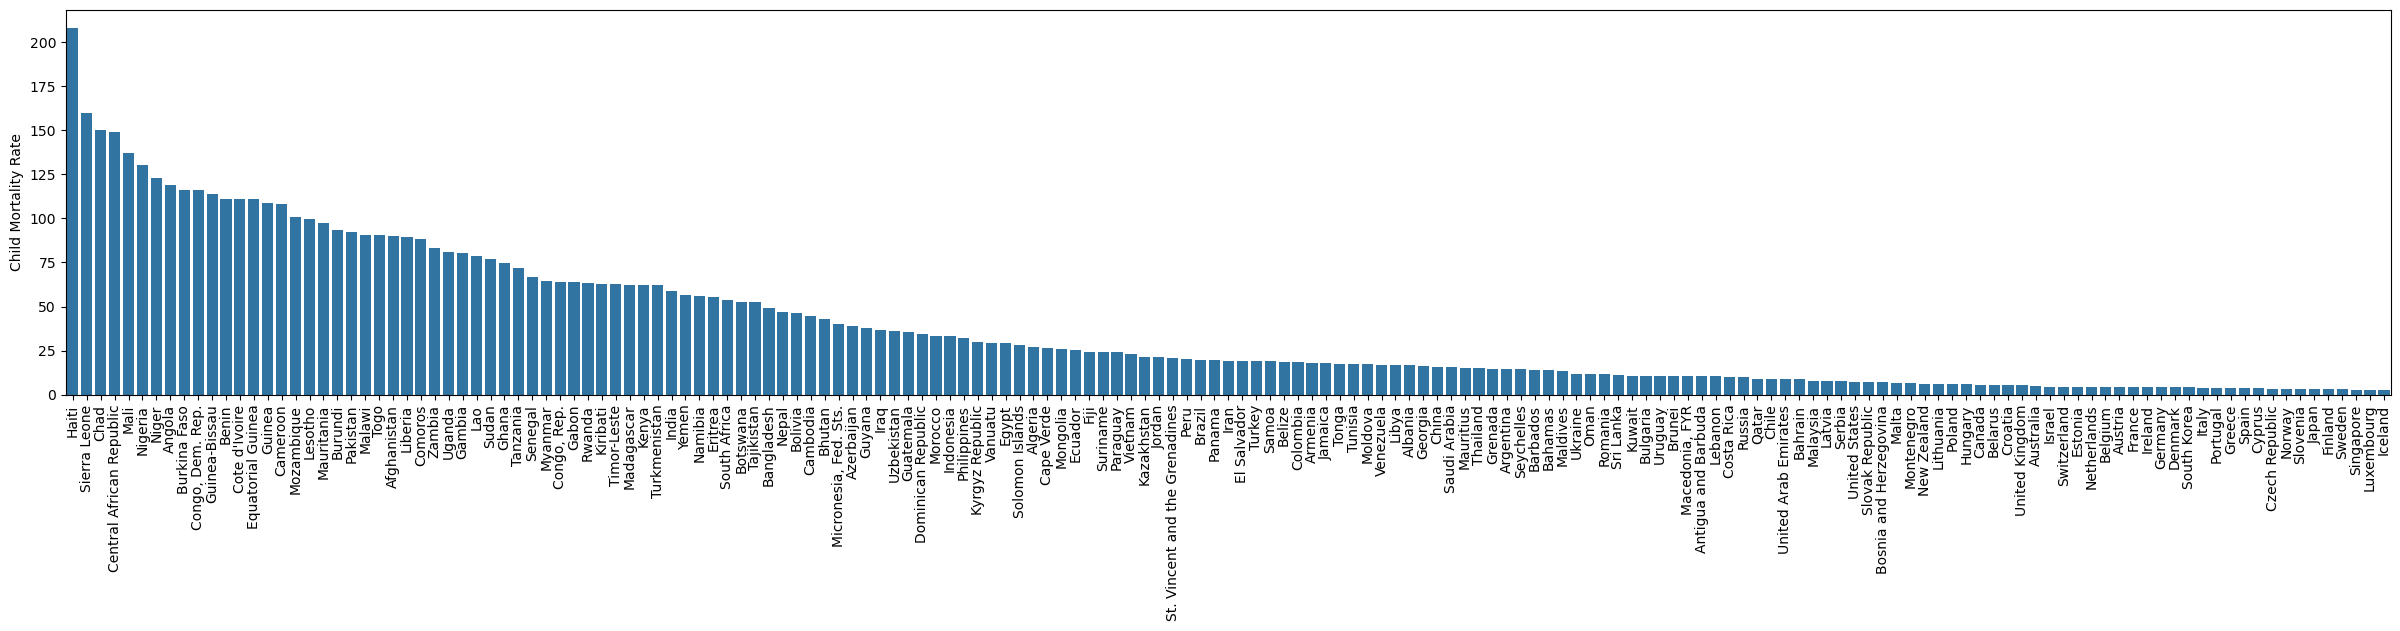

In [107]:
#Child Mortality Rate: Death of children under 5 years of age per 1000 live births
plt.figure(figsize = (30,5))
child_mort = df[['country','child_mort']].sort_values('child_mort', ascending = False)
ax = sns.barplot(x='country', y='child_mort', data= child_mort)
ax.set(xlabel = '', ylabel= 'Child Mortality Rate')
plt.xticks(rotation=90)
plt.show()

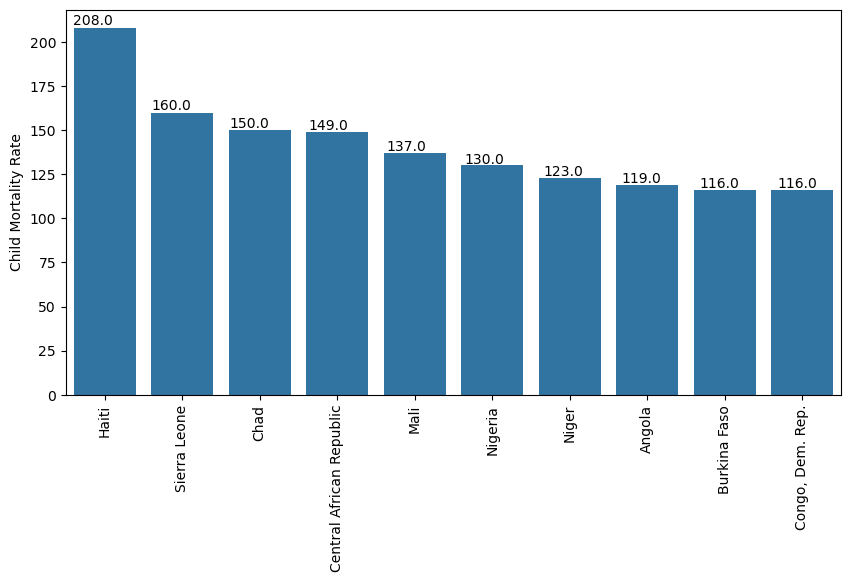

In [108]:
plt.figure(figsize = (10,5))
child_mort_top10 = df[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
ax = sns.barplot(x='country', y='child_mort', data= child_mort_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Child Mortality Rate')
plt.xticks(rotation=90)
plt.show()

The top 10 countries having the highest child mortality rate are present in Africa due to poor healthcare facilities.

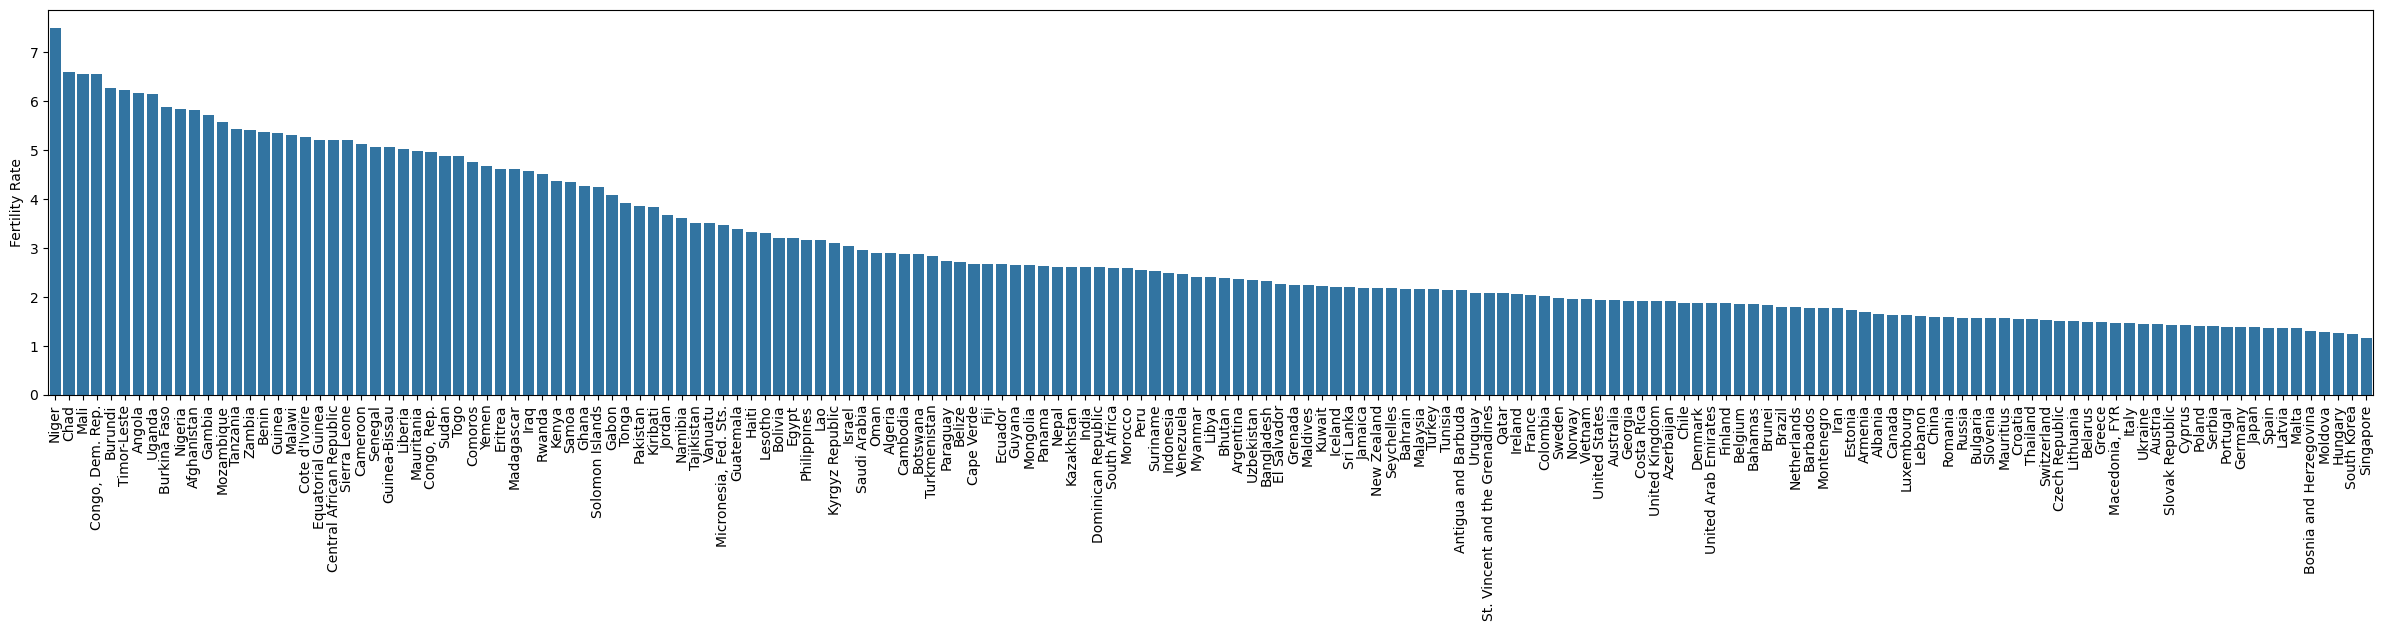

In [109]:
# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
plt.figure(figsize = (30,5))
total_fer = df[['country','total_fer']].sort_values('total_fer', ascending = False)
ax = sns.barplot(x='country', y='total_fer', data= total_fer)
ax.set(xlabel = '', ylabel= 'Fertility Rate')
plt.xticks(rotation=90)
plt.show()

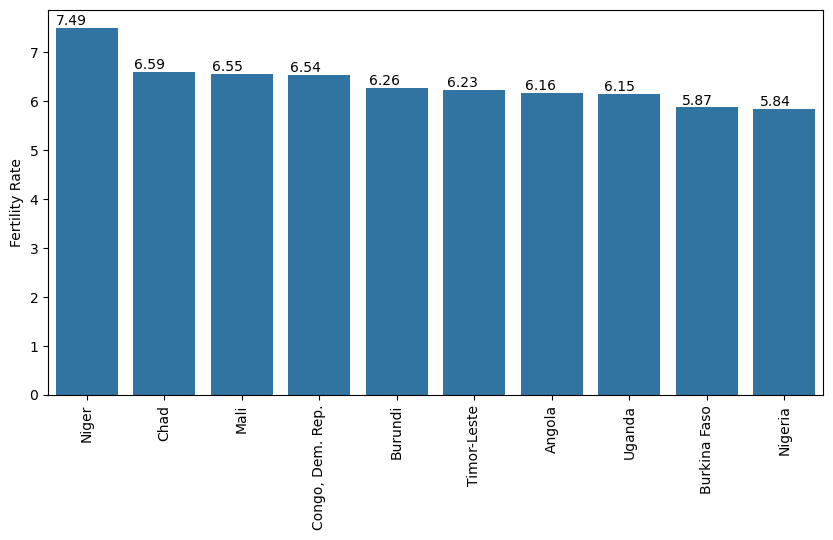

In [110]:
plt.figure(figsize = (10,5))
total_fer_top10 = df[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
ax = sns.barplot(x='country', y='total_fer', data= total_fer_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Fertility Rate')
plt.xticks(rotation=90)
plt.show()

Top 10 countries having highest fertility rate are countries which are among the poorest.

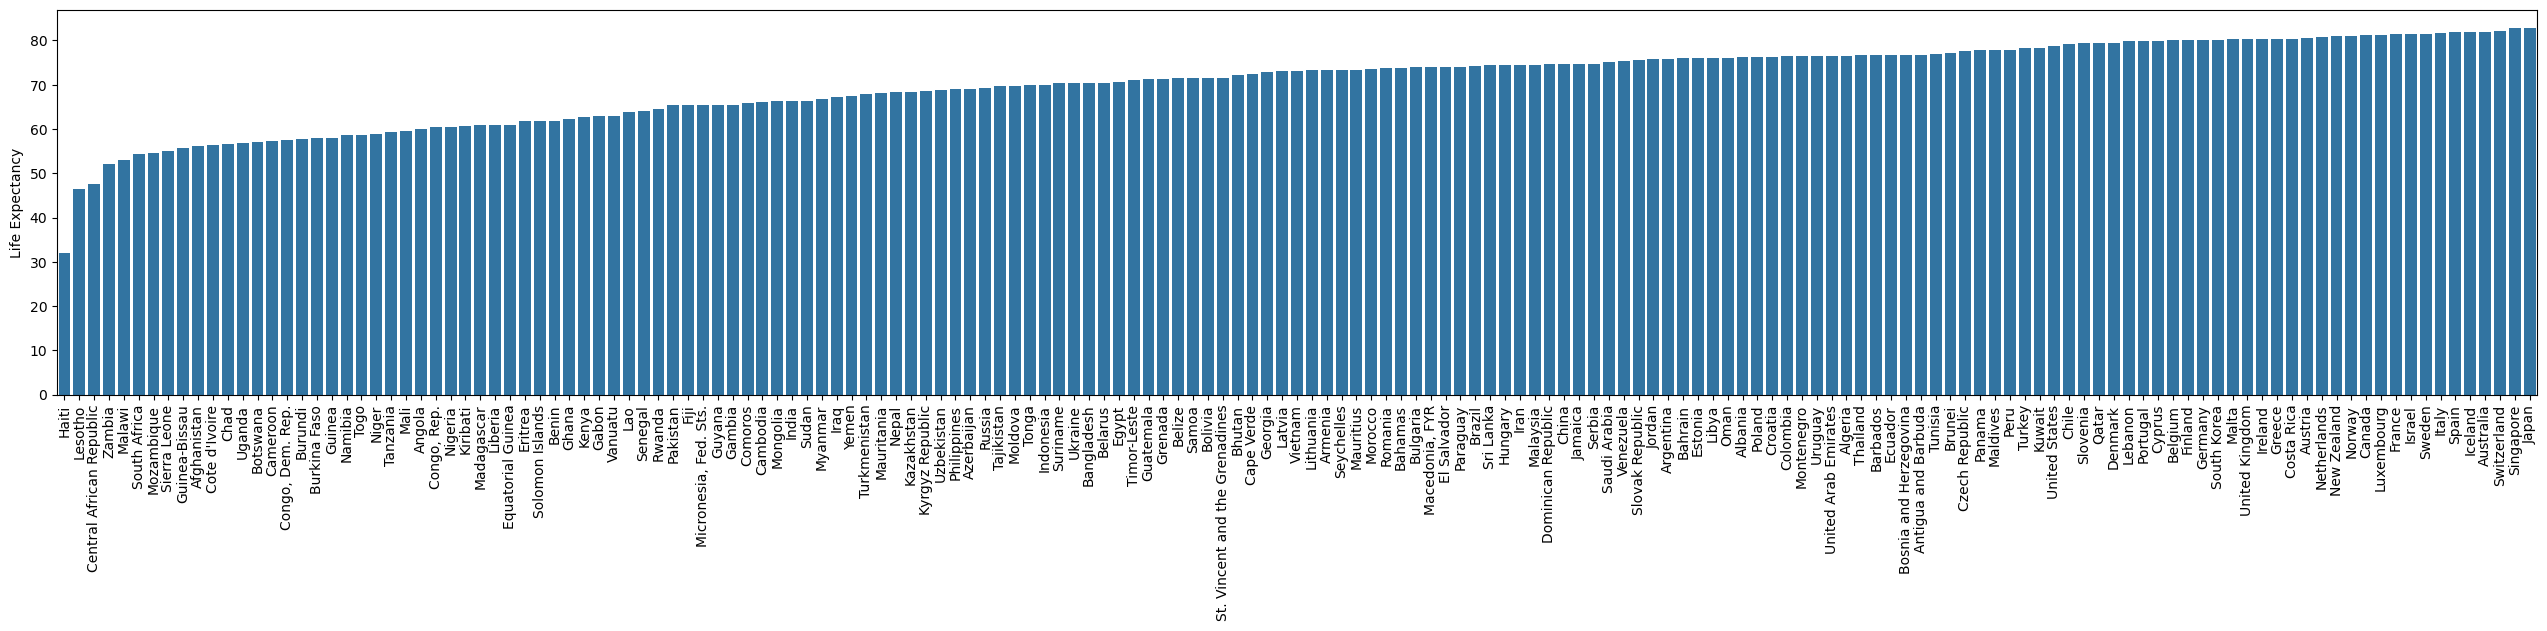

In [111]:
# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same
plt.figure(figsize = (32,5))
life_expec = df[['country','life_expec']].sort_values('life_expec', ascending = True)
ax = sns.barplot(x='country', y='life_expec', data= life_expec)
ax.set(xlabel = '', ylabel= 'Life Expectancy')
plt.xticks(rotation=90)
plt.show()

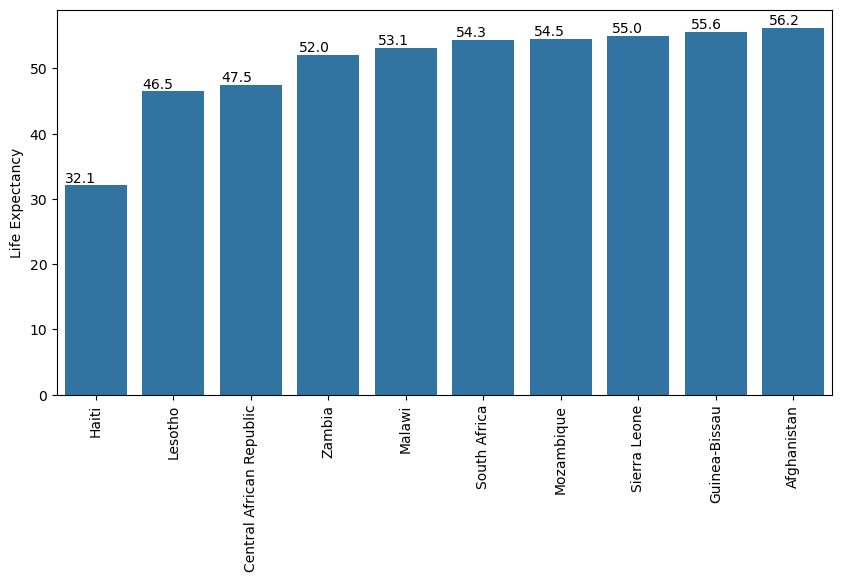

In [112]:
plt.figure(figsize = (10,5))
life_expec_bottom10 = df[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
ax = sns.barplot(x='country', y='life_expec', data= life_expec_bottom10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Life Expectancy')
plt.xticks(rotation=90)
plt.show()

Top 10 Countries having lowest Life Expectancy are places where healthcare system is not available or efficient.

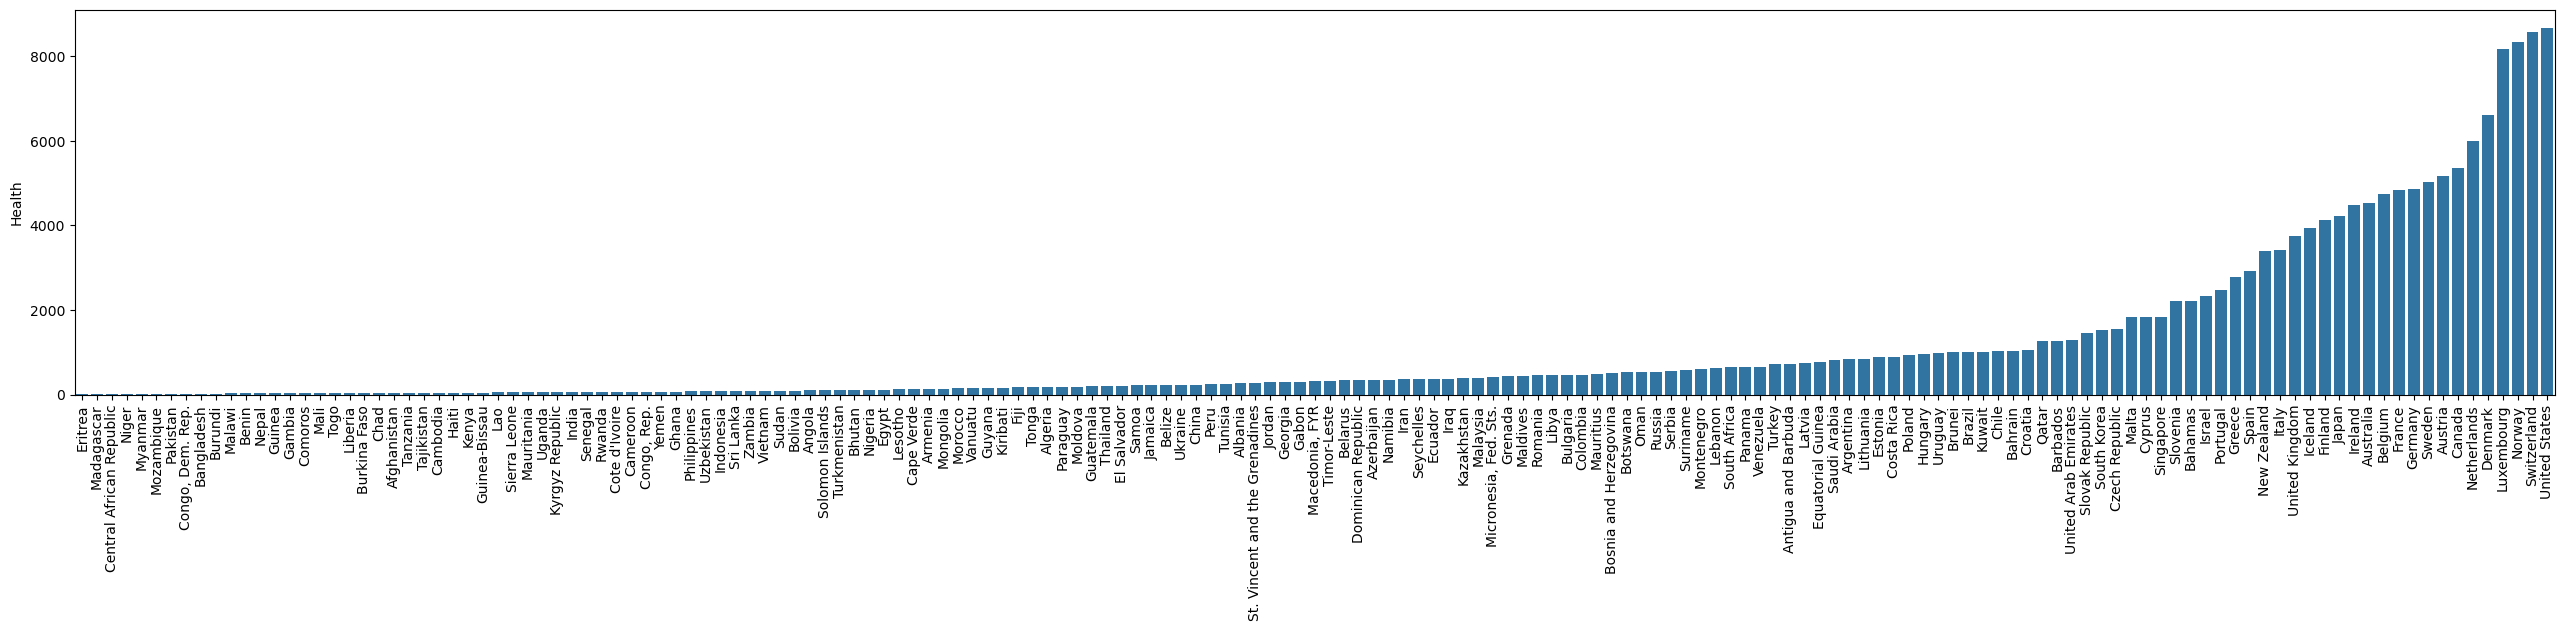

In [113]:
# Health :Total health spending as %age of Total GDP.
plt.figure(figsize = (32,5))
health = df[['country','health']].sort_values('health', ascending = True)
ax = sns.barplot(x='country', y='health', data= health)
ax.set(xlabel = '', ylabel= 'Health')
plt.xticks(rotation=90)
plt.show()

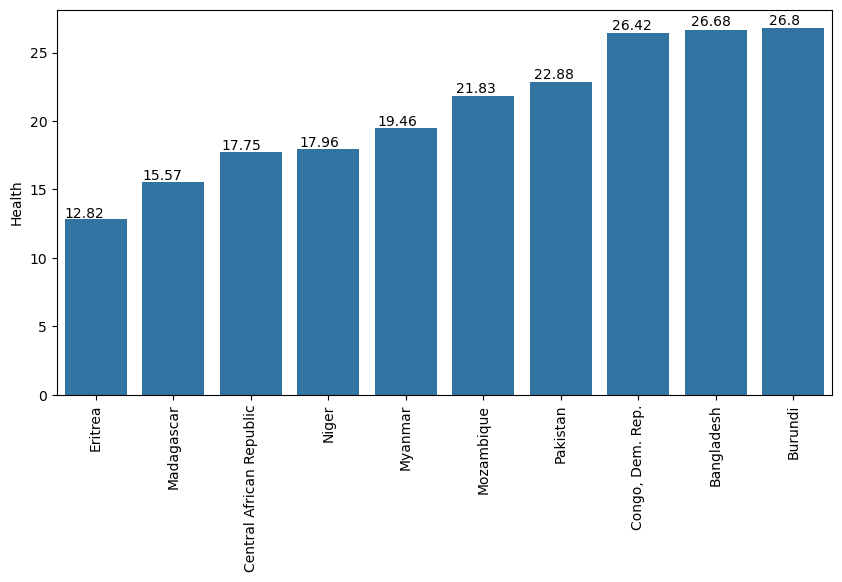

In [114]:
plt.figure(figsize = (10,5))
health_bottom10 = df[['country','health']].sort_values('health', ascending = True).head(10)
ax = sns.barplot(x='country', y='health', data= health_bottom10)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Health')
plt.xticks(rotation=90)
plt.show()

Top 10 Countries having lowest health spending are mix bag of countries where per Capita income is very high or involved in unrest activities.

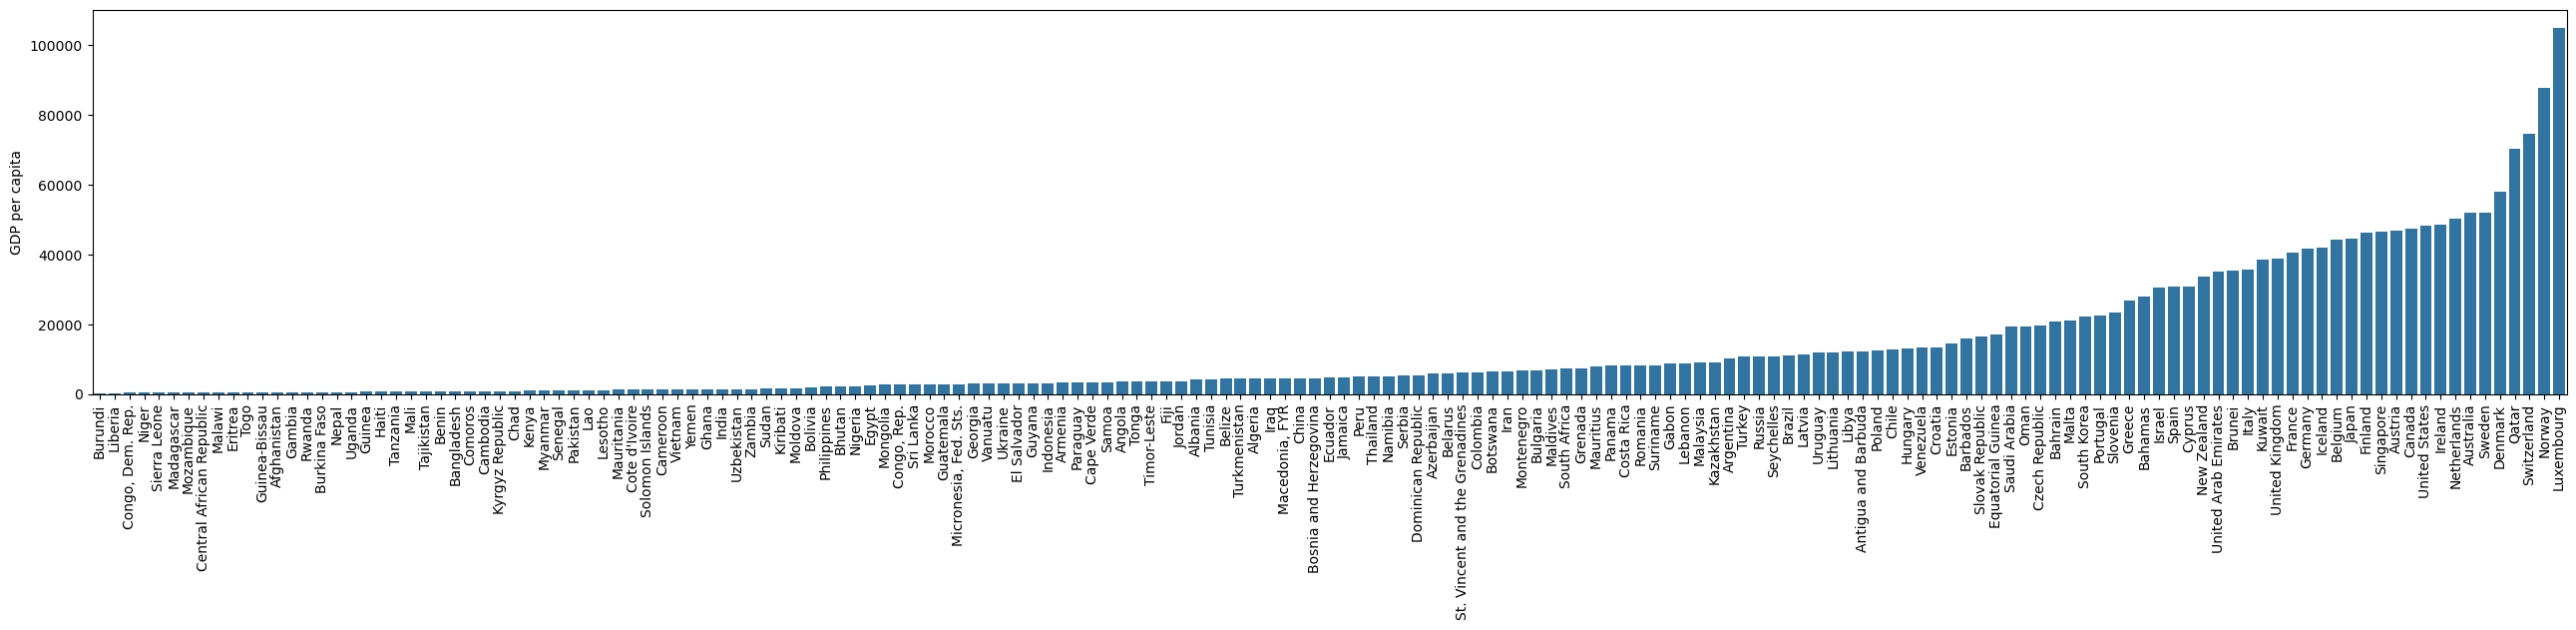

In [115]:
# The GDP per capita : Calculated as the Total GDP divided by the total population.
plt.figure(figsize = (32,5))
gdpp = df[['country','gdpp']].sort_values('gdpp', ascending = True)
ax = sns.barplot(x='country', y='gdpp', data= gdpp)
ax.set(xlabel = '', ylabel= 'GDP per capita')
plt.xticks(rotation=90)
plt.show()

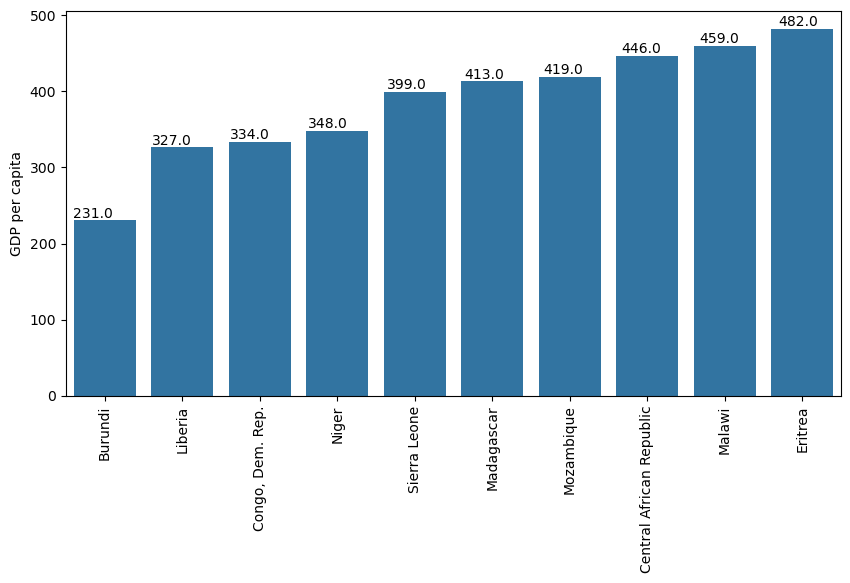

In [116]:
plt.figure(figsize = (10,5))
gdpp_bottom10 = df[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
ax = sns.barplot(x='country', y='gdpp', data= gdpp_bottom10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'GDP per capita')
plt.xticks(rotation=90)
plt.show()

Top 10 Countries having lowest GDP per capita are from East Africa.

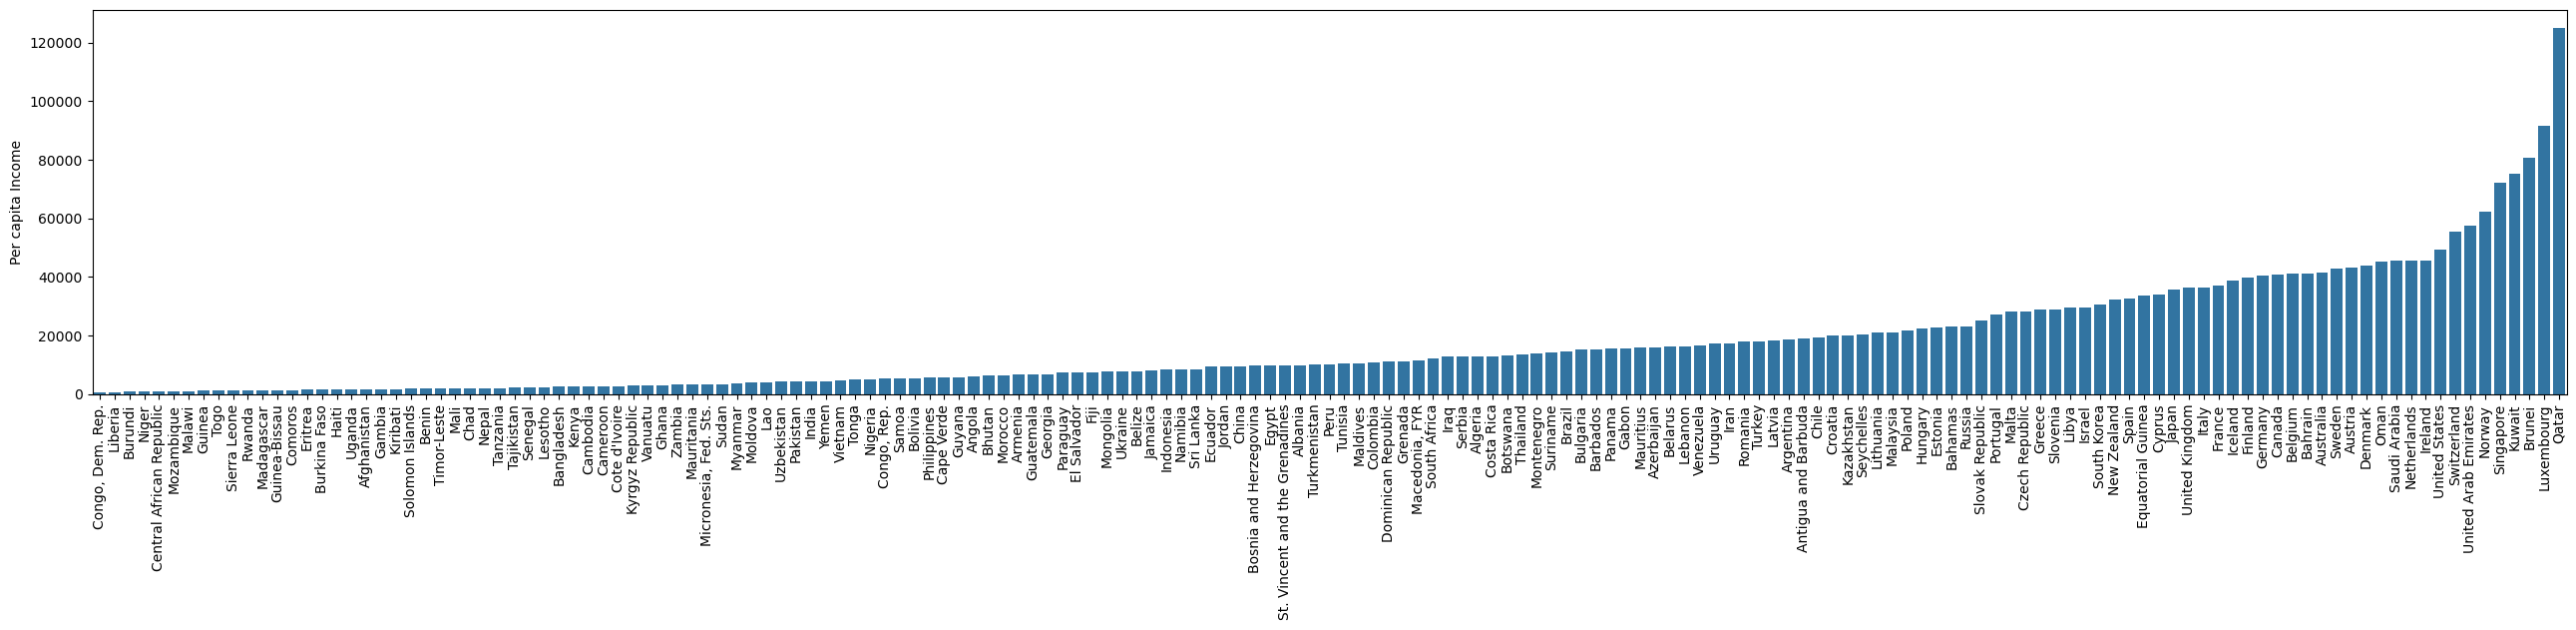

In [117]:
# Per capita Income : Net income per person
plt.figure(figsize = (32,5))
income = df[['country','income']].sort_values('income', ascending = True)
ax = sns.barplot(x='country', y='income', data=income)
ax.set(xlabel = '', ylabel= 'Per capita Income')
plt.xticks(rotation=90)
plt.show()

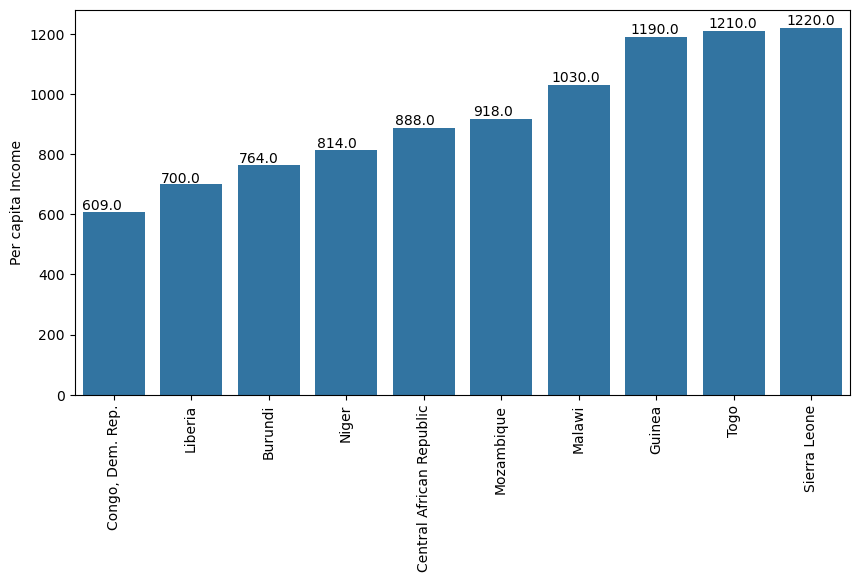

In [118]:
plt.figure(figsize = (10,5))
income_bottom10 = df[['country','income']].sort_values('income', ascending = True).head(10)
ax = sns.barplot(x='country', y='income', data= income_bottom10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Per capita Income')
plt.xticks(rotation=90)
plt.show()

Top 10 Countries having lowest Per capita Income are from East Africa.

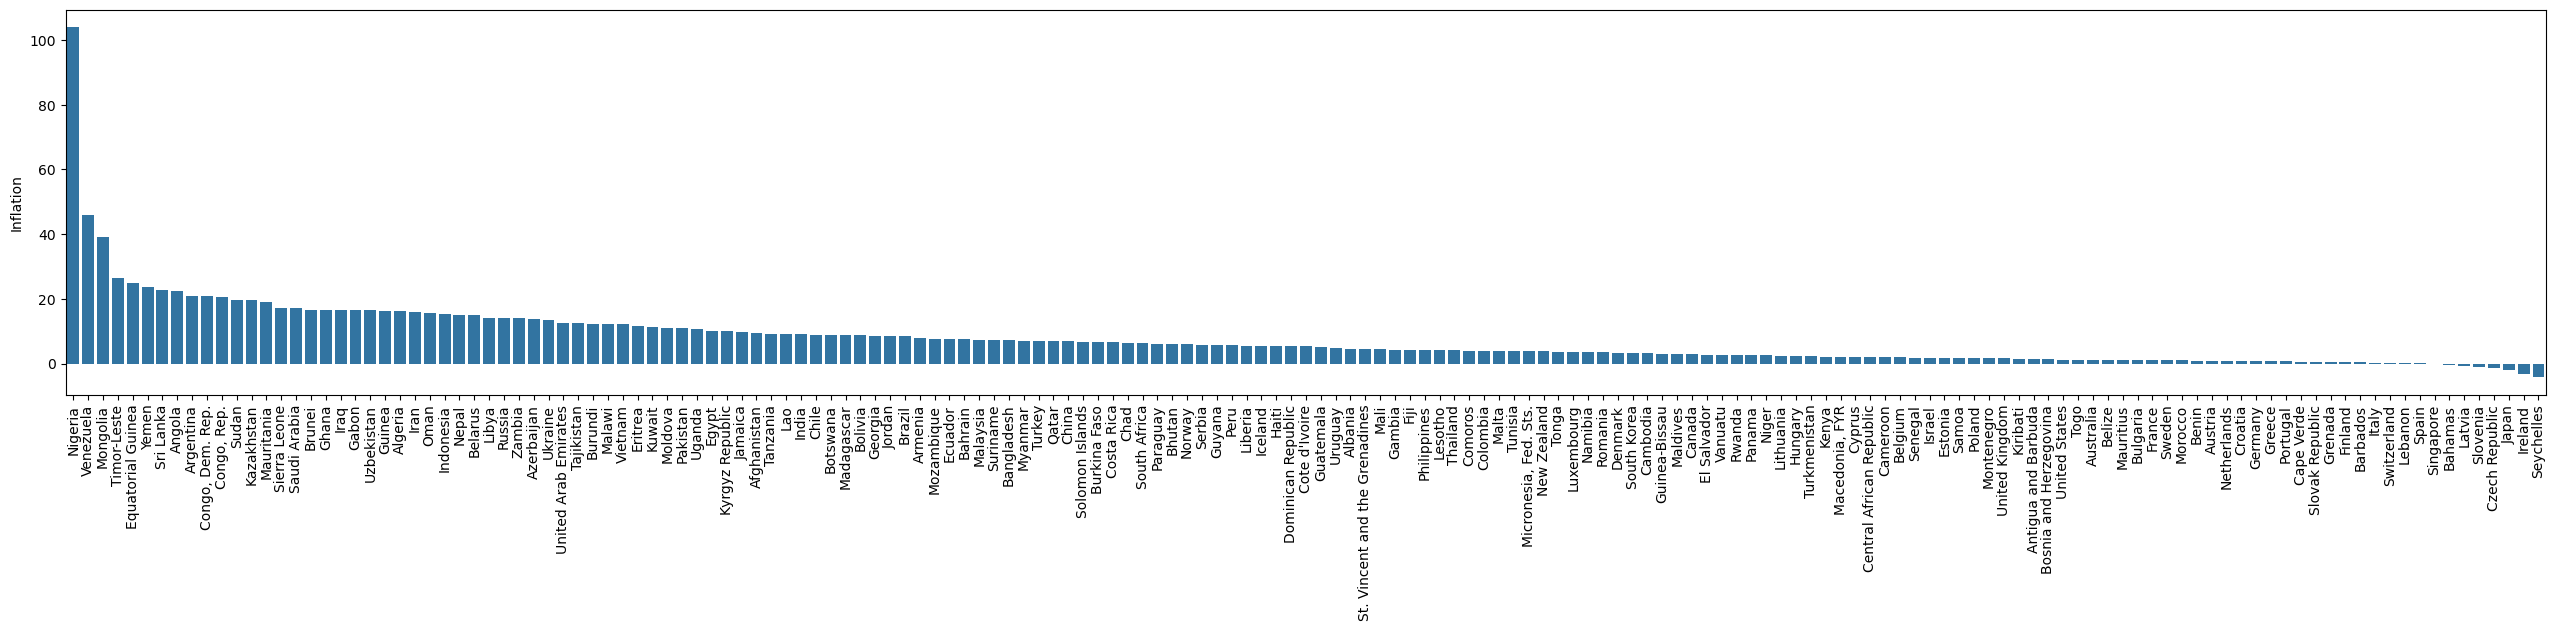

In [119]:
# Inflation: The measurement of the annual growth rate of the Total GDP
plt.figure(figsize = (32,5))
inflation = df[['country','inflation']].sort_values('inflation', ascending = False)
ax = sns.barplot(x='country', y='inflation', data= inflation)
ax.set(xlabel = '', ylabel= 'Inflation')
plt.xticks(rotation=90)
plt.show()

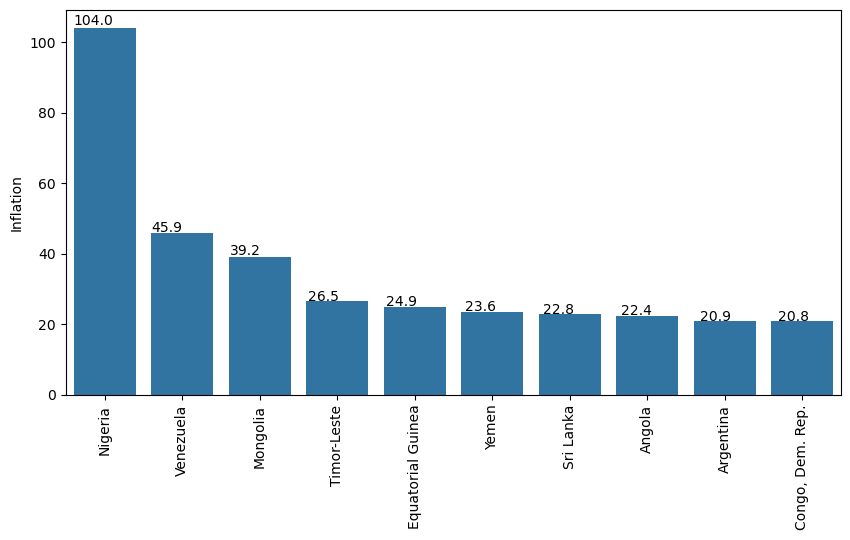

In [120]:
plt.figure(figsize = (10,5))
inflation_top10 = df[['country','inflation']].sort_values('inflation', ascending = False).head(10)
ax = sns.barplot(x='country', y='inflation', data= inflation_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Inflation')
plt.xticks(rotation=90)
plt.show()

Top 10 Countries having highest Inflation are from countries where there is social / political unrest in progress.

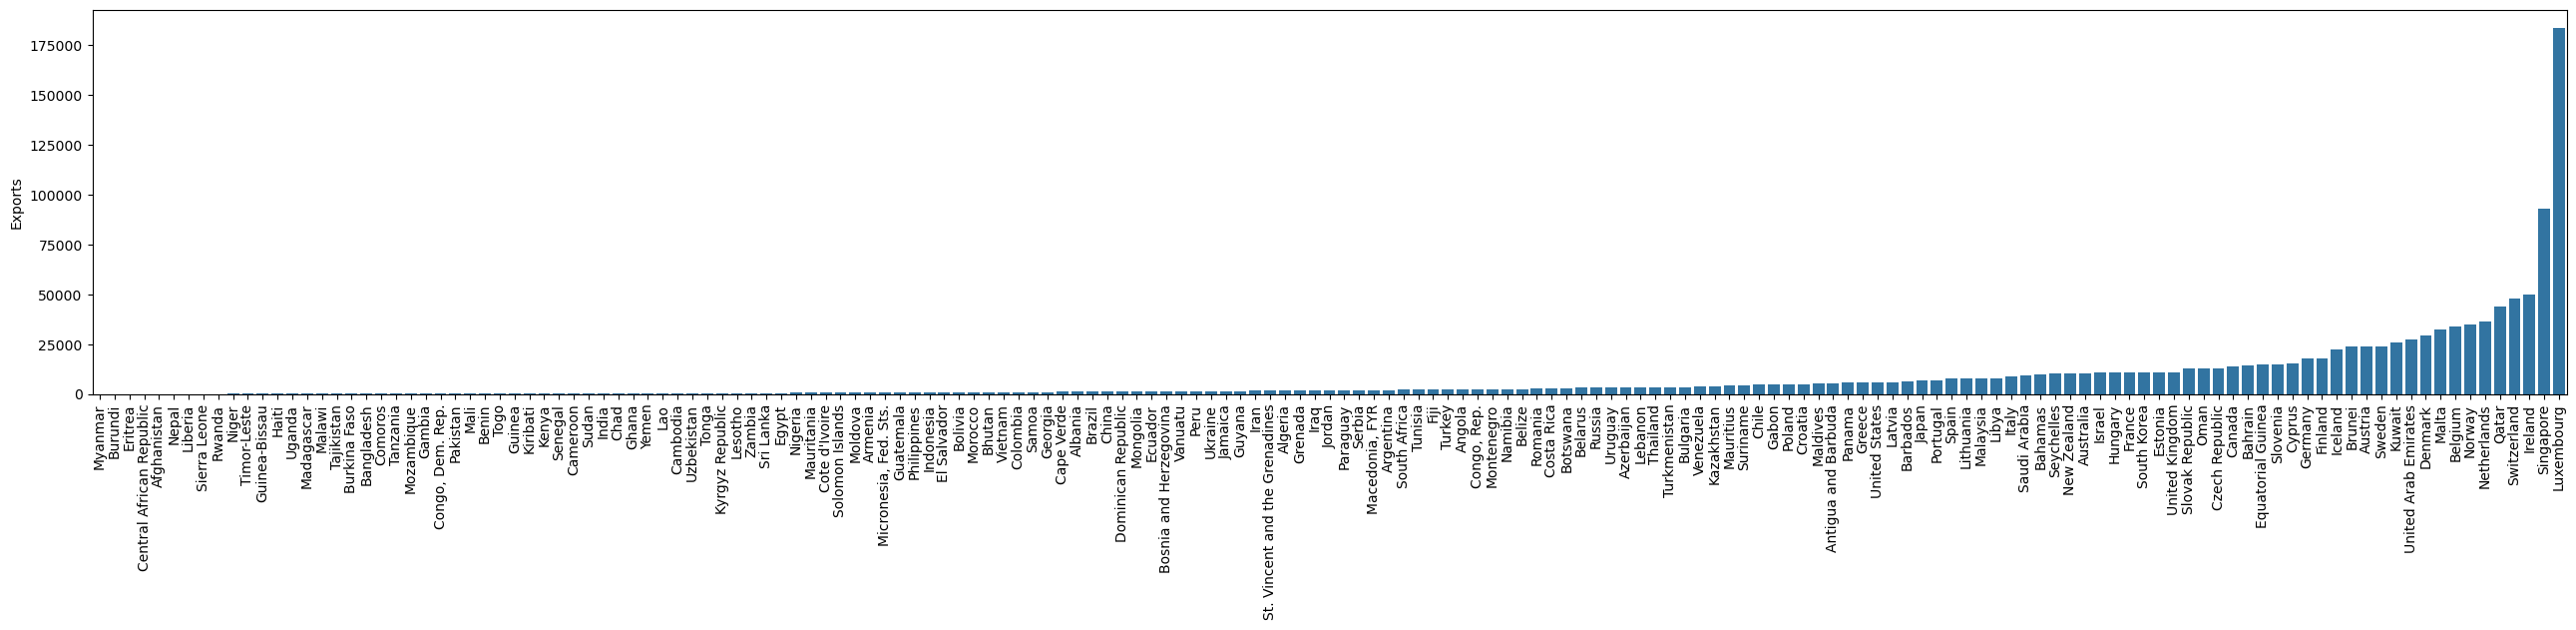

In [121]:
# Exports: Exports of goods and services. Given as %age of the Total GDP
plt.figure(figsize = (32,5))
exports = df[['country','exports']].sort_values('exports', ascending = True)
ax = sns.barplot(x='country', y='exports', data= exports)
ax.set(xlabel = '', ylabel= 'Exports')
plt.xticks(rotation=90)
plt.show()

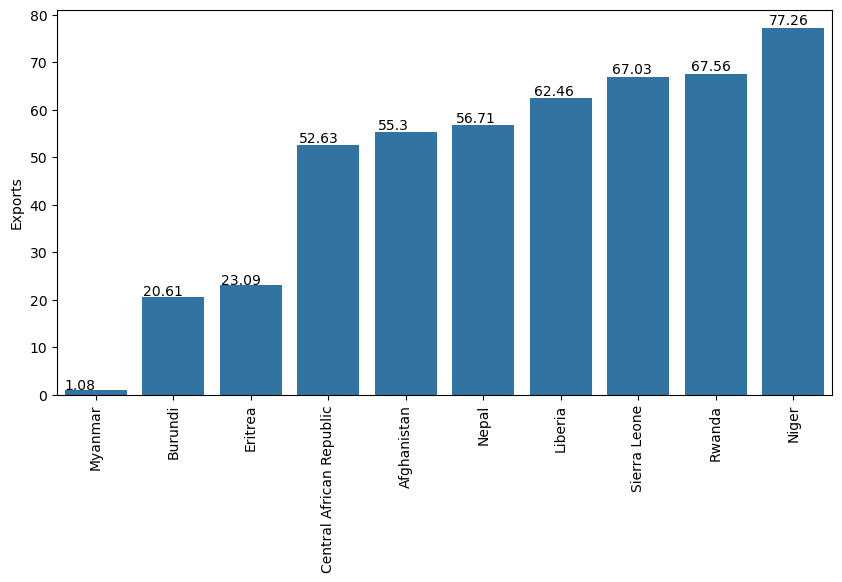

In [122]:
plt.figure(figsize = (10,5))
exports_bottom10 = df[['country','exports']].sort_values('exports', ascending = True).head(10)
ax = sns.barplot(x='country', y='exports', data= exports_bottom10)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Exports')
plt.xticks(rotation=90)
plt.show()

Top 10 Countries having lowest Exports are from mostly from underdeveloped / developing countries.

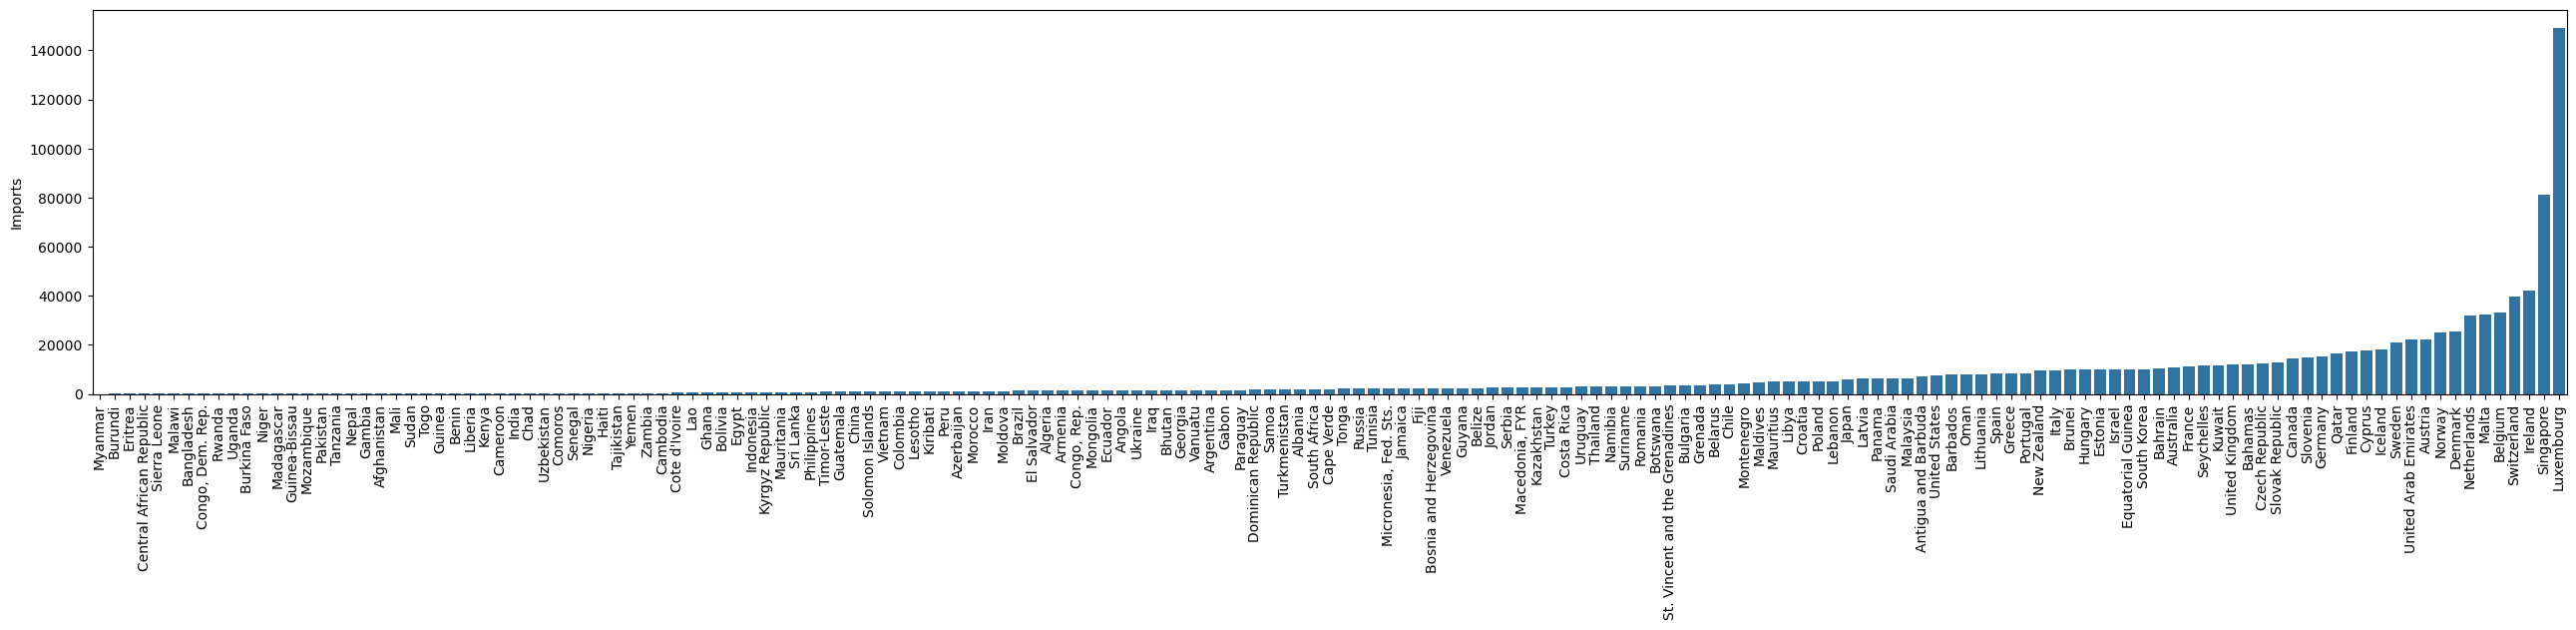

In [123]:
# Imports: Imports of goods and services. Given as %age of the Total GDP
plt.figure(figsize = (32,5))
imports = df[['country','imports']].sort_values('imports', ascending = True)
ax = sns.barplot(x='country', y='imports', data= imports)
ax.set(xlabel = '', ylabel= 'Imports')
plt.xticks(rotation=90)
plt.show()

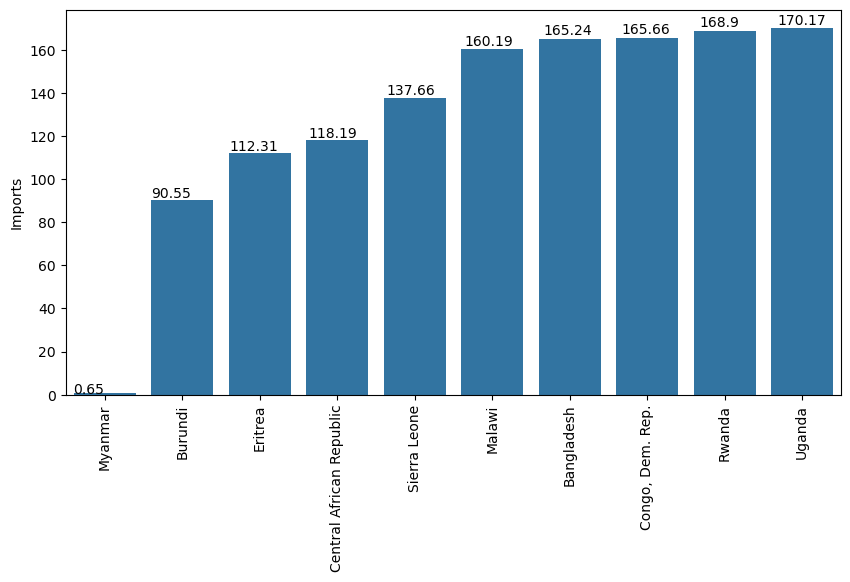

In [124]:
plt.figure(figsize = (10,5))
imports_bottom10 = df[['country','imports']].sort_values('imports', ascending = True).head(10)
ax = sns.barplot(x='country', y='imports', data= imports_bottom10)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Imports')
plt.xticks(rotation=90)
plt.show()

Top 10 Countries having lowest Imports are from mostly from Developed nations who are Atma-Nirbhar aka Self-Reliant, who manufacture locally to support own market or the underdeveloped / developing countries who are poor to afford imports due to political / economical turmoil.

Now, we will look at the lowest 5 countries for each factor.

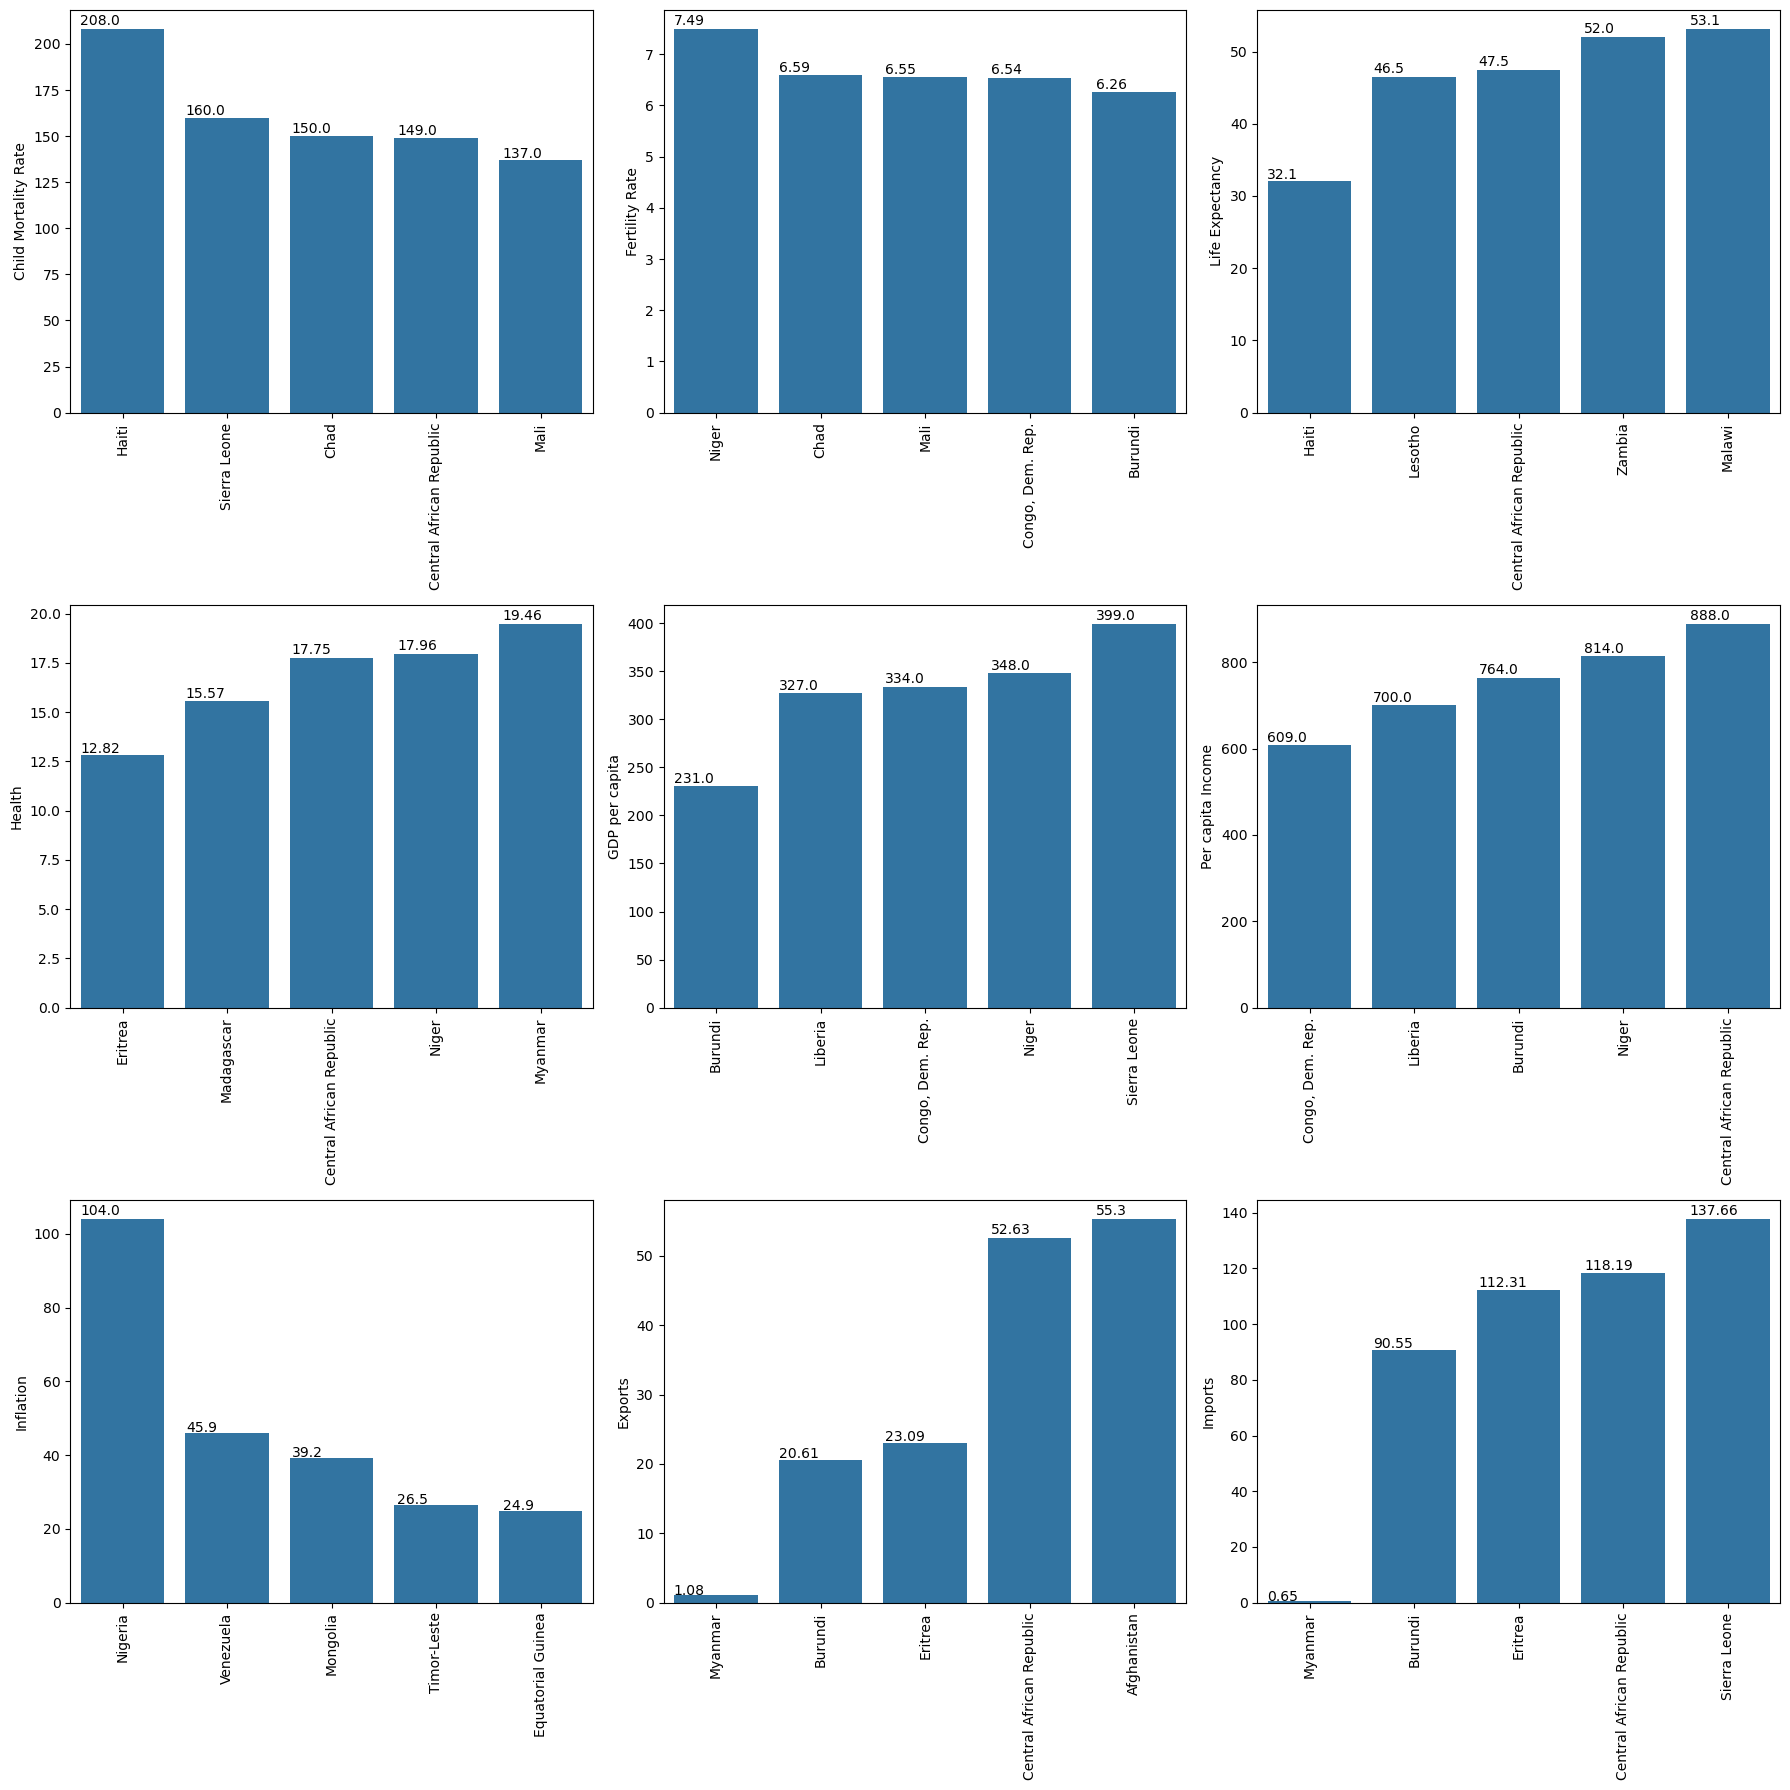

In [125]:
fig, axs = plt.subplots(3,3,figsize = (18,18))

# Child Mortality Rate : Death of children under 5 years of age per 1000 live births
top5_child_mort = df[['country','child_mort']].sort_values('child_mort', ascending = False).head()
ax = sns.barplot(x='country', y='child_mort', data= top5_child_mort, ax = axs[0,0])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Child Mortality Rate')

# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
top5_total_fer = df[['country','total_fer']].sort_values('total_fer', ascending = False).head()
ax = sns.barplot(x='country', y='total_fer', data= top5_total_fer, ax = axs[0,1])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Fertility Rate')

# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same
bottom5_life_expec = df[['country','life_expec']].sort_values('life_expec', ascending = True).head()
ax = sns.barplot(x='country', y='life_expec', data= bottom5_life_expec, ax = axs[0,2])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Life Expectancy')

# Health :Total health spending as %age of Total GDP.
bottom5_health = df[['country','health']].sort_values('health', ascending = True).head()
ax = sns.barplot(x='country', y='health', data= bottom5_health, ax = axs[1,0])
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Health')

# The GDP per capita : Calculated as the Total GDP divided by the total population.
bottom5_gdpp = df[['country','gdpp']].sort_values('gdpp', ascending = True).head()
ax = sns.barplot(x='country', y='gdpp', data= bottom5_gdpp, ax = axs[1,1])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'GDP per capita')

# Per capita Income : Net income per person
bottom5_income = df[['country','income']].sort_values('income', ascending = True).head()
ax = sns.barplot(x='country', y='income', data= bottom5_income, ax = axs[1,2])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Per capita Income')

# Inflation: The measurement of the annual growth rate of the Total GDP
top5_inflation = df[['country','inflation']].sort_values('inflation', ascending = False).head()
ax = sns.barplot(x='country', y='inflation', data= top5_inflation, ax = axs[2,0])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Inflation')


# Exports: Exports of goods and services. Given as %age of the Total GDP
bottom5_exports = df[['country','exports']].sort_values('exports', ascending = True).head()
ax = sns.barplot(x='country', y='exports', data= bottom5_exports, ax = axs[2,1])
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Exports')

# Imports: Imports of goods and services. Given as %age of the Total GDP
bottom5_imports = df[['country','imports']].sort_values('imports', ascending = True).head()
ax = sns.barplot(x='country', y='imports', data= bottom5_imports, ax = axs[2,2])
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Imports')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)    
plt.tight_layout()
plt.savefig('EDA')
plt.show()

In [126]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310


In [127]:
df.drop('country', axis=1, inplace=True)

In [128]:
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970
163,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500
164,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310
165,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310


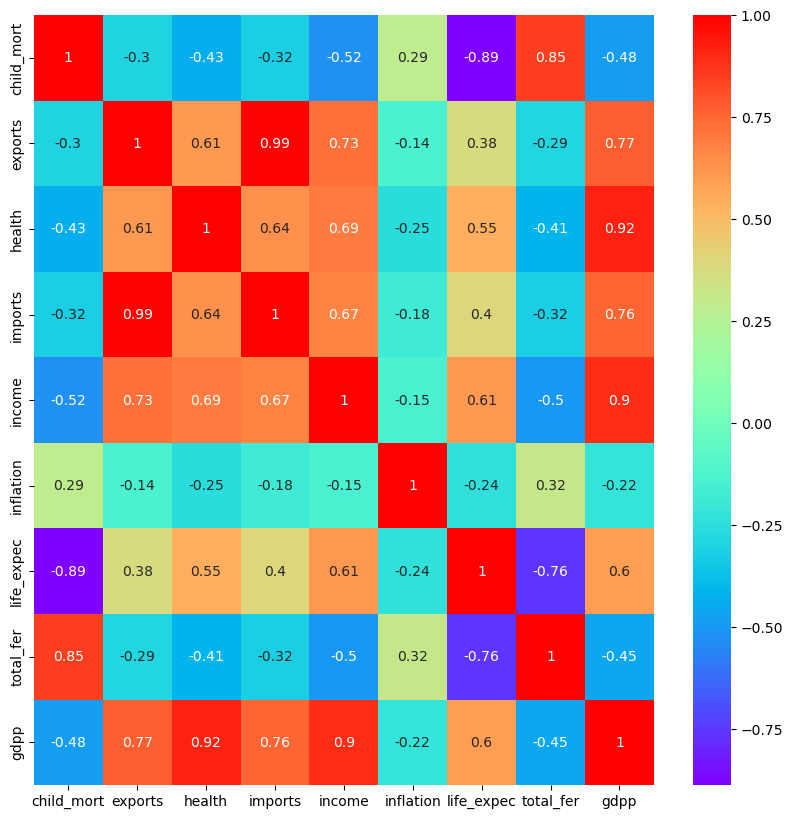

In [129]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True, cmap="rainbow")
plt.savefig('Correlation')
plt.show()

child_mortality is highly correlated with life_expectancy with correlation of -0.89 and with total_fertility with correlation of 0.85.
imports and exports are highly correlated with a correlation of 0.99. life_expectancy and total_fertility are highly correlated with a correlation of -0.76.

### Outlier Analysis

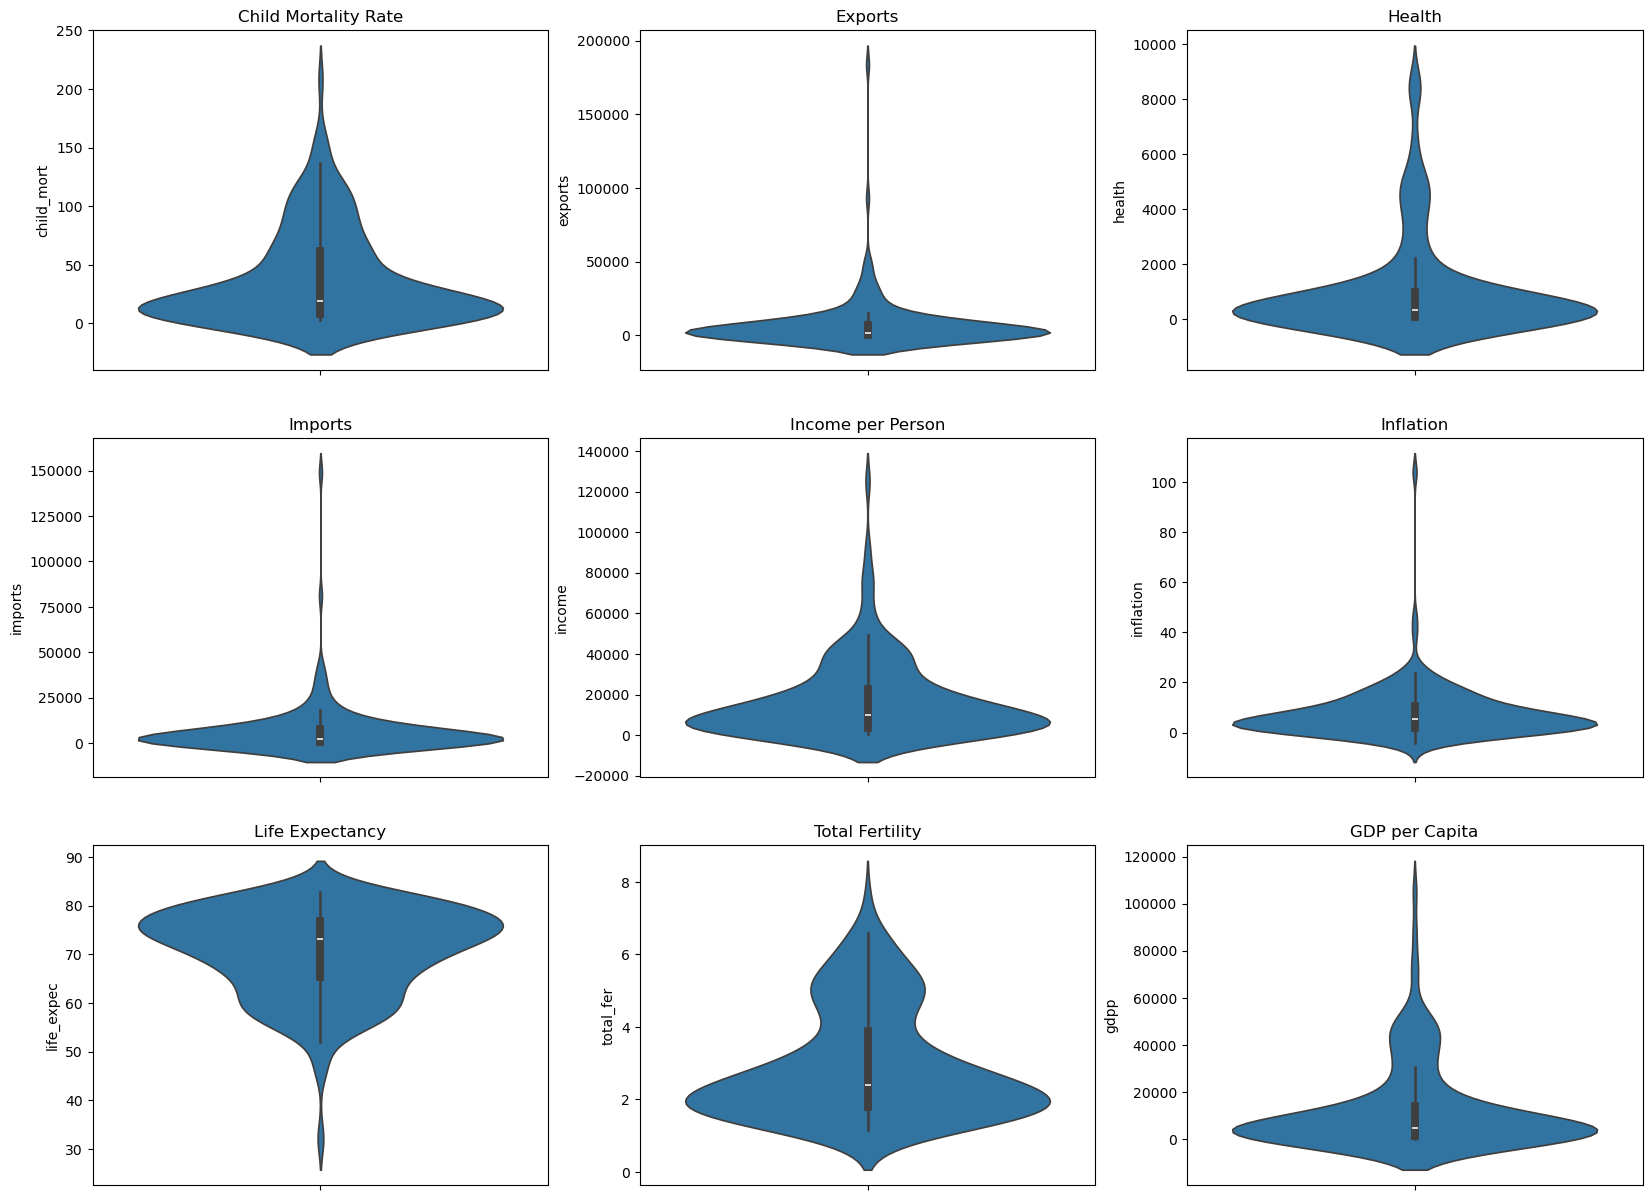

In [130]:
f, axes = plt.subplots(3, 3, figsize=(20, 15))
s=sns.violinplot(y=df.child_mort,ax=axes[0, 0])
axes[0, 0].set_title('Child Mortality Rate')
s=sns.violinplot(y=df.exports,ax=axes[0, 1])
axes[0, 1].set_title('Exports')
s=sns.violinplot(y=df.health,ax=axes[0, 2])
axes[0, 2].set_title('Health')

s=sns.violinplot(y=df.imports,ax=axes[1, 0])
axes[1, 0].set_title('Imports')
s=sns.violinplot(y=df.income,ax=axes[1, 1])
axes[1, 1].set_title('Income per Person')
s=sns.violinplot(y=df.inflation,ax=axes[1, 2])
axes[1, 2].set_title('Inflation')

s=sns.violinplot(y=df.life_expec,ax=axes[2, 0])
axes[2, 0].set_title('Life Expectancy')
s=sns.violinplot(y=df.total_fer,ax=axes[2, 1])
axes[2, 1].set_title('Total Fertility')
s=sns.violinplot(y=df.gdpp,ax=axes[2, 2])
axes[2, 2].set_title('GDP per Capita')
s.get_figure().savefig('boxplot subplots.png')
plt.show()

There is atleast one outlier in all the features. In case of gdpp and health, there are too many outliers. Since we have limited number of countries(167), removing these outliers would shrink the shape of data and the under-developed countries which are in actual dire need may not contribute to the dataset.

#### Plotting Histogram for each continous variable

C:\Users\talkt\AppData\Local\Temp\ipykernel_27960\2966908926.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i[1]])
C:\Users\talkt\AppData\Local\Temp\ipykernel_27960\2966908926.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i[1]])
C:\Users\talkt\AppData\Local\Temp\ipykernel_27960\

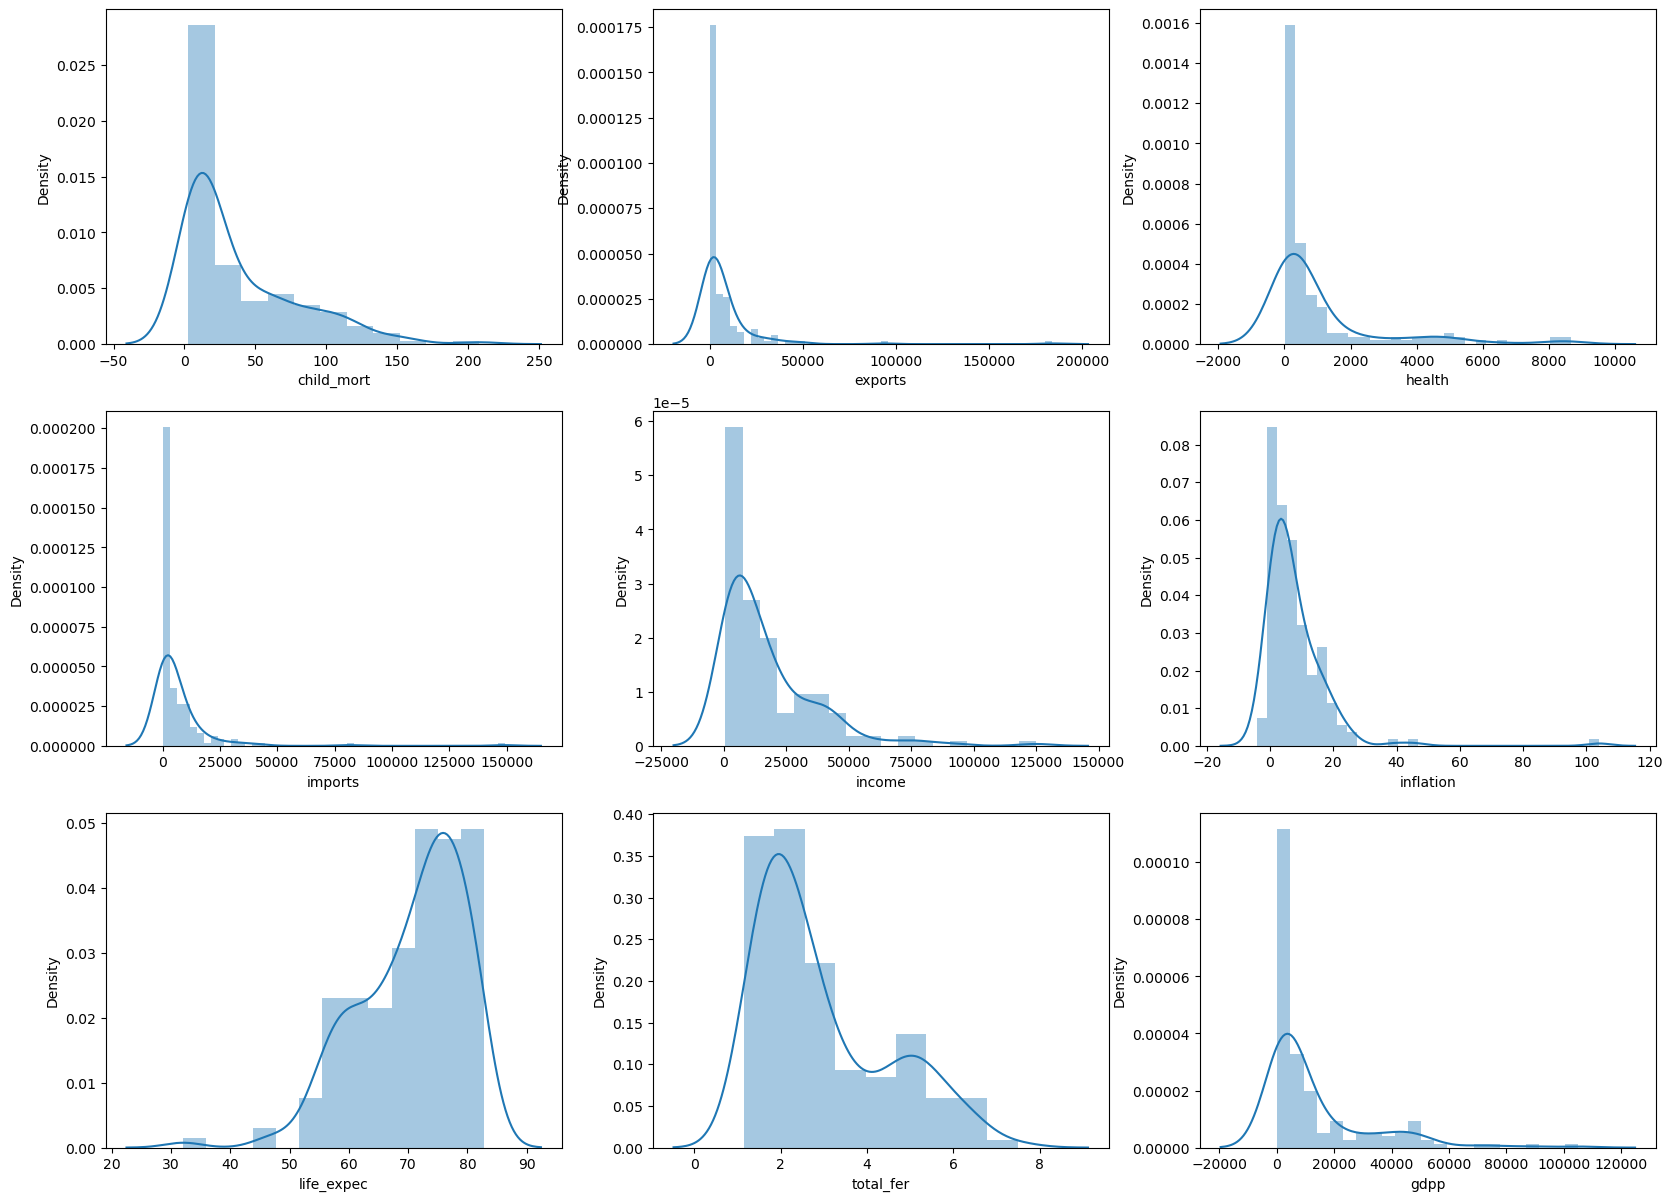

In [131]:
plt.figure(figsize = (20,20))
features=['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(features):
    plt.subplot(4,3,i[0]+1)
    sns.distplot(df[i[1]])

We will be using Percentile Capping (Winsorization) for handling outliers, which is the transformation of statistics by limiting extreme values in the statistical data to reduce the effect of possibly spurious outliers. In layman's terms, Winsorization (Winsorizing) at 1st and 99th percentile implies values that are less than the value at 1st percentile are replaced by the value at 1st percentile, and values that are greater than the value at 99th percentile are replaced by the value at 99th percentile.

In [132]:
Q3 = df.exports.quantile(0.99)
Q1 = df.exports.quantile(0.01)
df['exports'][df['exports']<=Q1]=Q1
df['exports'][df['exports']>=Q3]=Q3

Q3 = df.imports.quantile(0.99)
Q1 = df.imports.quantile(0.01)
df['imports'][df['imports']<=Q1]=Q1
df['imports'][df['imports']>=Q3]=Q3

Q3 = df.health.quantile(0.99)
Q1 = df.health.quantile(0.01)
df['health'][df['health']<=Q1]=Q1
df['health'][df['health']>=Q3]=Q3

Q3 = df.income.quantile(0.99)
Q1 = df.income.quantile(0.01)
df['income'][df['income']<=Q1]=Q1
df['income'][df['income']>=Q3]=Q3

Q3 = df.inflation.quantile(0.99)
Q1 = df.inflation.quantile(0.01)
df['inflation'][df['inflation']<=Q1]=Q1
df['inflation'][df['inflation']>=Q3]=Q3

Q3 = df.life_expec.quantile(0.99)
Q1 = df.life_expec.quantile(0.01)
df['life_expec'][df['life_expec']<=Q1]=Q1
df['life_expec'][df['life_expec']>=Q3]=Q3

Q3 = df.child_mort.quantile(0.99)
Q1 = df.child_mort.quantile(0.01)
df['child_mort'][df['child_mort']<=Q1]=Q1
df['child_mort'][df['child_mort']>=Q3]=Q3

Q3 = df.total_fer.quantile(0.99)
Q1 = df.total_fer.quantile(0.01)
df['total_fer'][df['total_fer']<=Q1]=Q1
df['total_fer'][df['total_fer']>=Q3]=Q3

Q3 = df.gdpp.quantile(0.99)
Q1 = df.gdpp.quantile(0.01)
df['gdpp'][df['gdpp']<=Q1]=Q1
df['gdpp'][df['gdpp']>=Q3]=Q3

C:\Users\talkt\AppData\Local\Temp\ipykernel_27960\1341218578.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['exports'][df['exports']<=Q1]=Q1
C:\Users\talkt\AppData\Local\Temp\ipykernel_27960\1341218578.py:3: SettingWithCopyWarning: 


In [133]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,37.904790,6538.351334,1054.240319,5873.845499,16858.601677,7.397332,70.645269,2.942896,12757.456527
std,39.026793,11415.230052,1790.825675,9422.259867,17956.060832,7.770993,8.553975,1.497595,17429.755235
min,2.800000,22.243716,17.009362,104.909640,742.240000,-2.348800,47.160000,1.243200,331.620000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


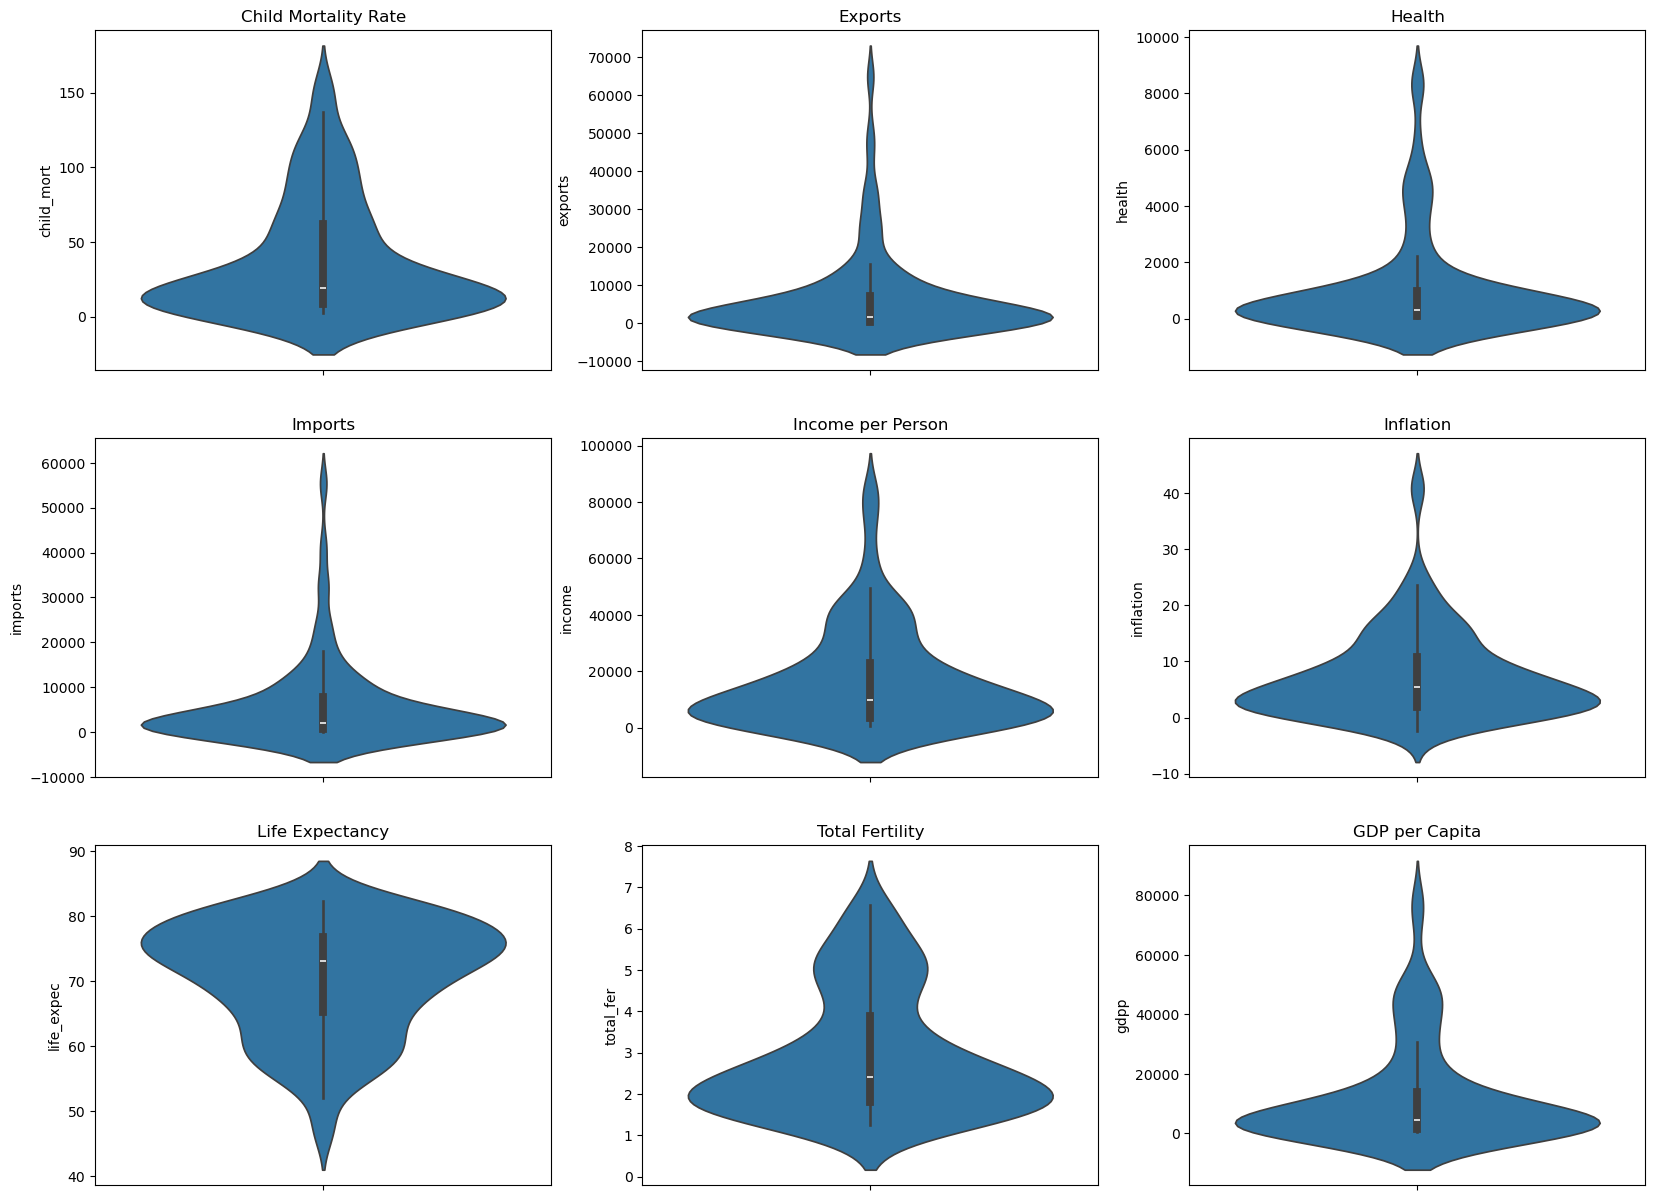

In [134]:
f, axes = plt.subplots(3, 3, figsize=(20, 15))
s=sns.violinplot(y=df.child_mort,ax=axes[0, 0])
axes[0, 0].set_title('Child Mortality Rate')
s=sns.violinplot(y=df.exports,ax=axes[0, 1])
axes[0, 1].set_title('Exports')
s=sns.violinplot(y=df.health,ax=axes[0, 2])
axes[0, 2].set_title('Health')

s=sns.violinplot(y=df.imports,ax=axes[1, 0])
axes[1, 0].set_title('Imports')
s=sns.violinplot(y=df.income,ax=axes[1, 1])
axes[1, 1].set_title('Income per Person')
s=sns.violinplot(y=df.inflation,ax=axes[1, 2])
axes[1, 2].set_title('Inflation')

s=sns.violinplot(y=df.life_expec,ax=axes[2, 0])
axes[2, 0].set_title('Life Expectancy')
s=sns.violinplot(y=df.total_fer,ax=axes[2, 1])
axes[2, 1].set_title('Total Fertility')
s=sns.violinplot(y=df.gdpp,ax=axes[2, 2])
axes[2, 2].set_title('GDP per Capita')
s.get_figure().savefig('boxplot subplots.png')
plt.show()

In [135]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


## Standardization of the data

In [136]:
df = (df - df.mean())/df.std()
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.339982,-0.567930,-0.565283,-0.597049,-0.849218,0.262858,-1.688720,1.921150,-0.700208
1,-0.545902,-0.472452,-0.439097,-0.412439,-0.385864,-0.374126,0.661065,-0.863315,-0.497279
2,-0.271731,-0.422743,-0.484837,-0.474770,-0.220460,1.119891,0.684446,-0.035321,-0.476051
3,2.077937,-0.380120,-0.532512,-0.462678,-0.610301,1.930599,-1.232792,2.148181,-0.529408
4,-0.707329,-0.086494,-0.177896,0.139240,0.124827,-0.766611,0.719517,-0.542801,-0.031983
...,...,...,...,...,...,...,...,...,...
162,-0.223047,-0.451531,-0.501621,-0.457285,-0.774591,-0.614765,-0.893768,0.371999,-0.561537
163,-0.533090,-0.235725,-0.218553,-0.371232,-0.019971,4.385626,0.555850,-0.315770,0.042602
164,-0.374225,-0.490148,-0.538655,-0.511897,-0.688826,0.605157,0.286970,-0.662994,-0.656777
165,0.471348,-0.538347,-0.550798,-0.575574,-0.689383,2.085019,-0.367697,1.153252,-0.656777


## K-Means